In [ ]:
# @title Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sklearn
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [30]:
# @title Importing Dataset
# Reading the dataset
data = pd.read_csv("/content/Churn_Modelling.csv")

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
# Checking the shape of our data
data.shape

(10000, 14)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [45]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [49]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [50]:
data.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [51]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [164]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


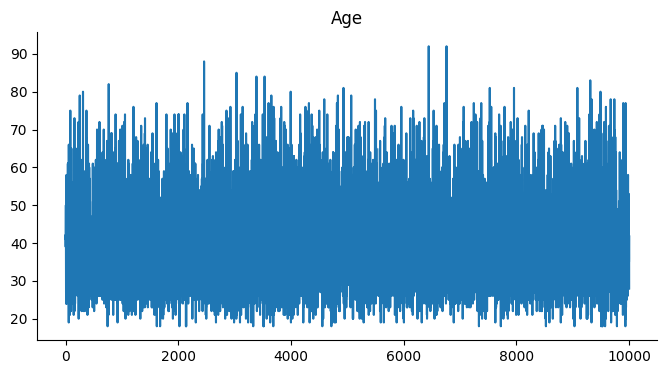

In [63]:
# @title Age

from matplotlib import pyplot as plt
data['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

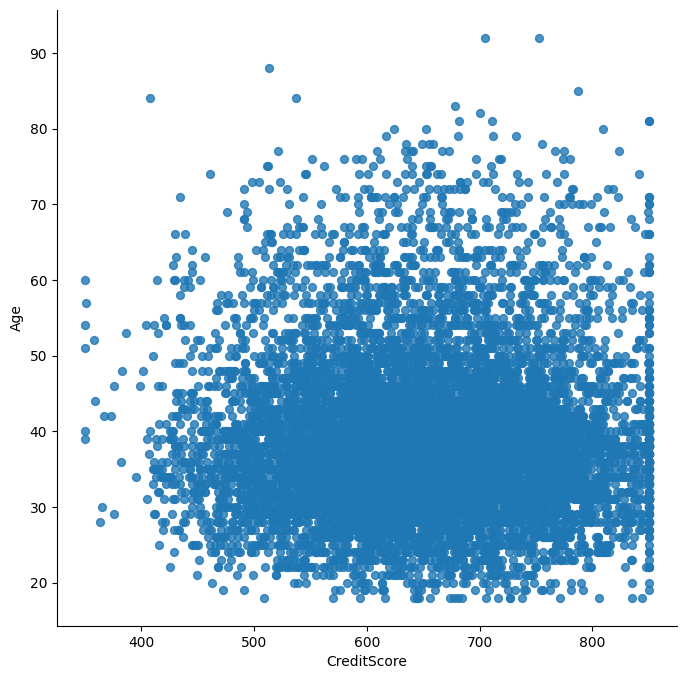

In [61]:
# @title CreditScore vs Age

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='CreditScore', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [64]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


<Axes: ylabel='count'>

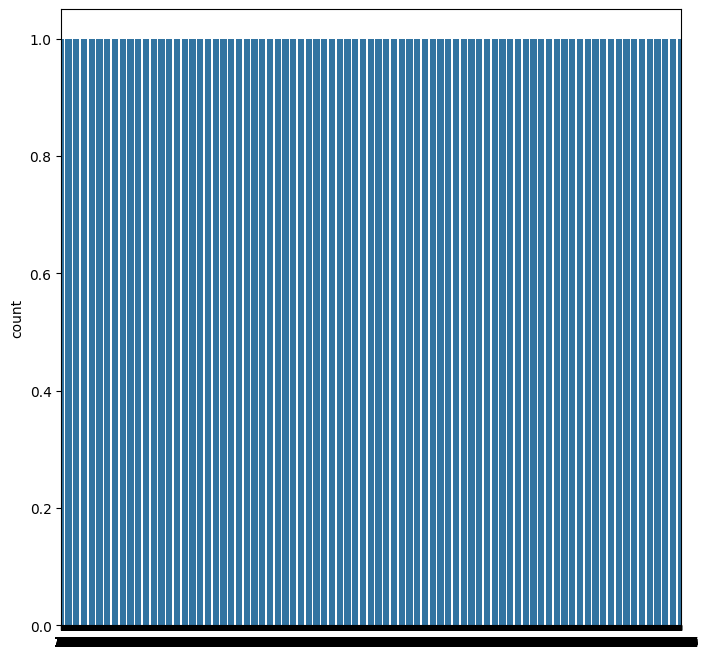

In [67]:
sns.countplot(data['Exited'])

In [73]:
X=data.drop('Exited',axis=1)
Y=data['Exited']

In [56]:
data=pd.get_dummies(data,drop_first=True)

In [75]:
# @title Splitting the dataset into the Training set and Test set
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [78]:
# @title Feature Scaling
sc=StandardScaler()

In [79]:
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [80]:
X_train

array([[-1.24021723,  0.77986083,  0.35390313, ..., -0.57812007,
        -0.57504086, -1.09665089],
       [ 0.75974873, -0.27382717,  0.35390313, ...,  1.72974448,
        -0.57504086,  0.91186722],
       [-1.72725557, -0.9443559 , -0.3390904 , ..., -0.57812007,
        -0.57504086, -1.09665089],
       ...,
       [-0.51484098,  0.87565065,  1.39339343, ...,  1.72974448,
        -0.57504086,  0.91186722],
       [ 0.73902369, -0.36961699, -1.03208393, ..., -0.57812007,
        -0.57504086, -1.09665089],
       [ 0.95663657, -1.32751517,  0.35390313, ..., -0.57812007,
         1.73900686,  0.91186722]])

In [85]:
# @title Logistic Regression
log = LogisticRegression()

In [87]:
log.fit(X_train,Y_train)

LogisticRegression()

In [118]:
Y_pred1 = log.predict(X_test)

In [119]:
accuracy_score(Y_test,Y_pred1)

0.809

In [120]:
precision_score(Y_test,Y_pred1)

0.5827814569536424

In [121]:
recall_score(Y_test,Y_pred1)

0.21621621621621623

In [122]:
f1_score(Y_test,Y_pred1)

0.31541218637992835

In [123]:
# @title Random Forest
rf=RandomForestClassifier()

In [124]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [125]:
Y_pred2 = rf.predict(X_test)

In [126]:
accuracy_score(Y_test,Y_pred2)

0.8645

In [127]:
precision_score(Y_test,Y_pred2)

0.7833333333333333

In [128]:
# @title Gradient Boosting
gbc = GradientBoostingClassifier()

In [129]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [130]:
Y_pred3 = gbc.predict(X_test)

In [131]:

accuracy_score(Y_test,Y_pred3)

0.8575

In [132]:

precision_score(Y_test,Y_pred3)

0.7584745762711864

In [135]:
final_data = pd.DataFrame({'Models':['LR','RF','GBC'],'ACC':[accuracy_score(Y_test,Y_pred1),
                                                             accuracy_score(Y_test,Y_pred2),
                                                             accuracy_score(Y_test,Y_pred3)]})

In [138]:
final_data

,Models,ACC
0,LR,0.8090
1,RF,0.8645
2,GBC,0.8575


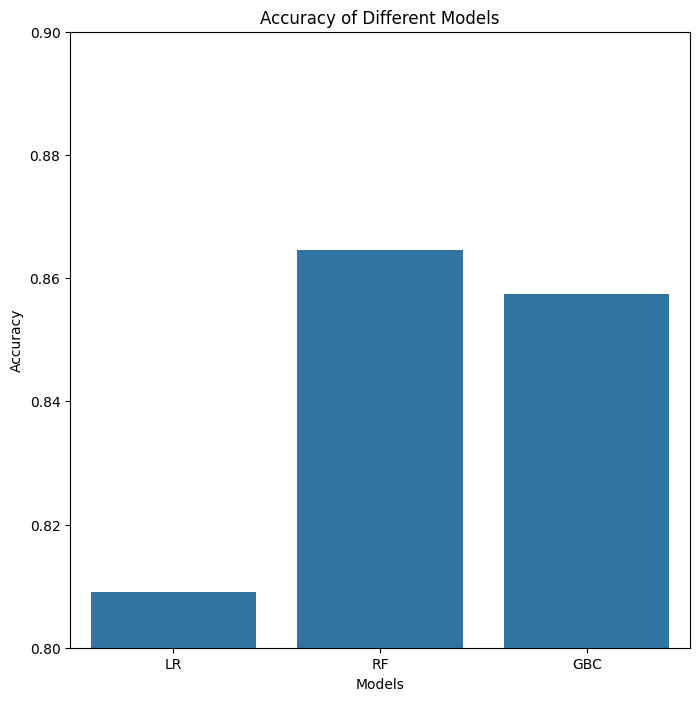

In [150]:
# Create bar plot using seaborn
sns.barplot(data=final_data, x='Models', y='ACC')
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 0.9)  # Set y-axis limits to ensure visibility of differences
plt.show()

In [155]:
final_data_ = pd.DataFrame({'Models':['LR','RF','GBC'],'PRE':[precision_score(Y_test,Y_pred1),
                                                             precision_score(Y_test,Y_pred2),
                                                             precision_score(Y_test,Y_pred3)]})

In [156]:
final_data_

,Models,PRE
0,LR,0.582781
1,RF,0.783333
2,GBC,0.758475


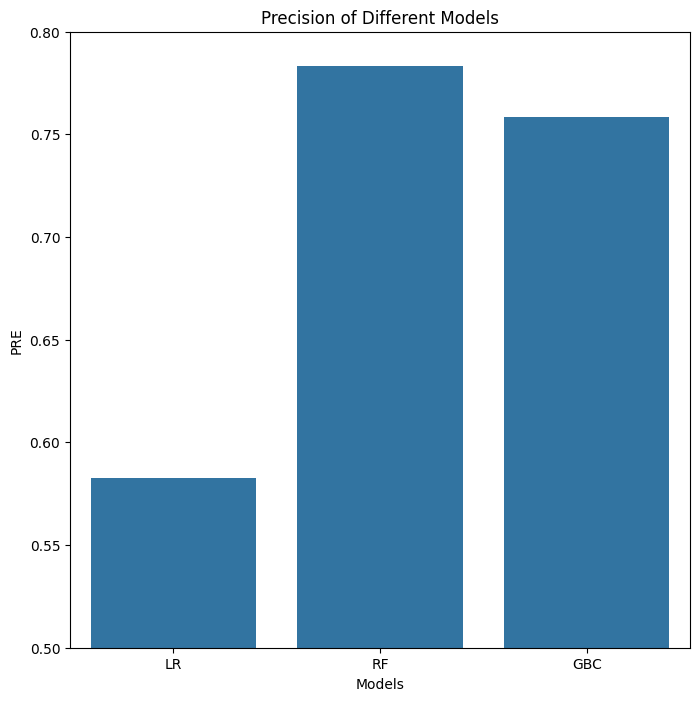

In [163]:
# Create bar plot using seaborn
sns.barplot(data=final_data_, x='Models', y='PRE')
plt.title('Precision of Different Models')
plt.xlabel('Models')
plt.ylabel('PRE')
plt.ylim(0.5, 0.8)  # Set y-axis limits to ensure visibility of differences
plt.show()